# Energy spectrum of emitted electrons from ionization events

Directly calls rsoopic.h2crosssections.ejectedEnergy to check that the energy spectrum of emitted electrons looks OK

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, m_e
# Since PYTHONPATH is ignored, modify sys.path directly...
#import rsoopic.h2crosssections as h2crosssections
sys.path.insert(1, '/home/vagrant/jupyter/rsoopic/rsoopic')
import h2crosssections
import random

# Warp
# Origin date: Mon, 2 Jul 2018 16:00:48 -0600
# Local date: Mon, 2 Jul 2018 16:00:48 -0600
# Commit hash: b464829
# /home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/warp/warp.pyc
# /home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/warp/warpC.so
# Thu Sep 13 23:04:20 2018
# import warp time 0.562320947647 seconds
# For more help, type warphelp()


1000.0147600315081
Spent 0.002 s generating ejected energies
max. particle energy:  486.0392733772868  eV


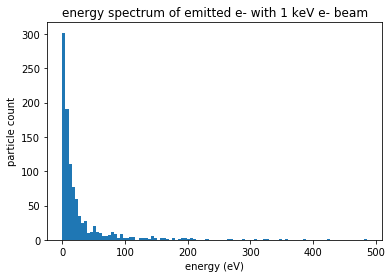

In [2]:
gamma = lambda v: math.sqrt(1./(1.-v*v/(c*c)))
#for i in range(10):
#    beta = 0.0624 + i * 1.e-5
#    v = beta * c
#    print i, beta, m_e * c * c * (gamma(v) - 1.) / e

beta = 0.06247 # for 1keV kinetic energy
n = 1000
v = np.full((n), beta * c)

energy = h2crosssections.ejectedEnergy(v, n)
print 'max. particle energy: ', energy.max(), ' eV'

#for i in range(100):
#    print energy[i]

plt.hist(energy, 100)
plt.title('energy spectrum of emitted e- with 1 keV e- beam')
plt.xlabel('energy (eV)')
plt.ylabel('particle count')
plt.savefig('emitted_energy_spectrum.png')
plt.show()

## Moller cross section

Implementation of pure Moller cross section for comparison

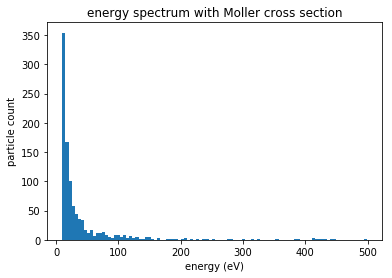

In [4]:
eps = m_e * c * c * (gamma(beta * c) - 1.) / e # incident energy in eV
eps_min = 10.

for i in range(n):
    Xrand = random.random()
    energy[i] = eps * eps_min / (eps - Xrand * (eps - 2 * eps_min))

plt.hist(energy, 100)
plt.title('energy spectrum with Moller cross section')
plt.xlabel('energy (eV)')
plt.ylabel('particle count')
#plt.savefig('emitted_energy_spectrum.png')
plt.show()

The emitted-electron energy spectrum with the existing rsoopic cross section is in reasonable agreement with Moller at 1keV incident energy